This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

**建立一個小型的卷積網路**

In [21]:
from tensorflow import keras
from tensorflow.keras import layers


In [22]:
inputs = keras.Input(shape=(28, 28, 1))

In [23]:
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu",padding="same")(inputs)
x = layers.MaxPooling2D(pool_size=2,padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2,padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu",padding="same")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

顯示 summary

In [24]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0   

**Training the convnet on MNIST images**

### 把model拿去訓練mnist

In [25]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 20s 20ms/step - loss: 0.1265 - accuracy: 0.9598
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0387 - accuracy: 0.9886
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0272 - accuracy: 0.9915
Epoch 4/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0206 - accuracy: 0.9937
Epoch 5/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0174 - accuracy: 0.9947


**Evaluating the convnet**

**進行評估**

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0259 - accuracy: 0.9909
Test accuracy: 0.991


#### The convolution operation

#### 透過卷機操作了解padding、stride、max-pooling的原理

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [28]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [29]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 61952)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                619530    
Total params: 712,202
Trainable params: 712,202
Non-trainable params: 0
_____________________________________________________

## Training a convnet from scratch on a small dataset

### 在小型資料集訓練一個卷積網路

### The relevance of deep learning for small-data problems

### Downloading the data

### 登入kaggle得到token

In [30]:
import json

token = {"username":"","key":""}

with open('C:/Users/user/.kaggle/kaggle.json') as f:
    data = json.load(f)
    
token['username'] = data['username']
token['key'] = data['key']



下載dogs-vs-cats資料

In [31]:
!kaggle competitions download -c dogs-vs-cats


  0%|          | 0.00/812M [00:00<?, ?B/s]
  0%|          | 1.00M/812M [00:01<14:17, 992kB/s]
  0%|          | 2.00M/812M [00:01<10:06, 1.40MB/s]
  0%|          | 3.00M/812M [00:02<11:18, 1.25MB/s]
  0%|          | 4.00M/812M [00:03<09:33, 1.48MB/s]
  1%|          | 5.00M/812M [00:03<08:40, 1.63MB/s]
  1%|          | 6.00M/812M [00:04<08:12, 1.72MB/s]
  1%|          | 7.00M/812M [00:04<07:25, 1.89MB/s]
  1%|          | 8.00M/812M [00:05<07:15, 1.94MB/s]
  1%|          | 9.00M/812M [00:05<08:07, 1.73MB/s]
  1%|          | 10.0M/812M [00:06<08:23, 1.67MB/s]
  1%|▏         | 11.0M/812M [00:07<09:09, 1.53MB/s]
  1%|▏         | 12.0M/812M [00:07<09:03, 1.54MB/s]
  2%|▏         | 13.0M/812M [00:08<08:42, 1.60MB/s]
  2%|▏         | 14.0M/812M [00:09<08:34, 1.63MB/s]
  2%|▏         | 15.0M/812M [00:10<09:29, 1.47MB/s]
  2%|▏         | 16.0M/812M [00:10<09:22, 1.48MB/s]
  2%|▏         | 17.0M/812M [00:11<08:39, 1.60MB/s]
  2%|▏         | 18.0M/812M [00:11<08:16, 1.68MB/s]
  2%|▏         | 19.0

**解壓縮到dogs-vs-cats資料夾裡**

In [35]:
import zipfile
import os

data_path = os.getcwd()+'/dogs-vs-cats/'
with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall(data_path)
    


In [36]:
for file in os.listdir(data_path):
    if file.endswith('zip'):
        with zipfile.ZipFile(data_path+file, 'r') as zip_ref:
            zip_ref.extractall(data_path)

In [37]:
from pathlib import Path
import tree


**資料夾分支**

In [40]:
for line in tree(Path.cwd() / 'dogs-vs-cats'):
    print(line)

dogs-vs-cats
├── test1
│   └── 12500 images
├── train
│   └── 25000 images
├── sampleSubmission.csv
├── test1.zip
└── train.zip


**Copying images to training, validation, and test directories**

**複製一些檔案到training、validation、test資料夾**

In [41]:
import os, shutil, pathlib

original_dir = pathlib.Path("dogs-vs-cats/train")
new_base_dir = pathlib.Path("dogs-vs-cats/cats_vs_dogs_small")



In [42]:
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### 移動後的分支

In [43]:
for line in tree(Path.cwd() / 'dogs-vs-cats'):
    print(line)

dogs-vs-cats
├── cats_vs_dogs_small
│   ├── test
│   │   ├── cat
│   │   │   └── 1000 images
│   │   └── dog
│   │       └── 1000 images
│   ├── train
│   │   ├── cat
│   │   │   └── 1000 images
│   │   └── dog
│   │       └── 1000 images
│   └── validation
│       ├── cat
│       │   └── 500 images
│       └── dog
│           └── 500 images
├── test1
│   └── 12500 images
├── train
│   └── 25000 images
├── sampleSubmission.csv
├── test1.zip
└── train.zip


### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

在 dogs vs. cats 資料集上使用小型卷積網路

In [44]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [45]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 41, 41, 128)       7385

**Configuring the model for training**

進行配置後訓練

In [46]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

使用 keras 的 image_dataset_from_directory 去讀取train、validation、test的圖片

In [47]:
from tensorflow.keras.utils import image_dataset_from_directory

new_base_dir = pathlib.Path("dogs-vs-cats/cats_vs_dogs_small")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


在每個地方都包含有兩種類別的圖片

In [48]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [49]:
random_numbers

array([[-0.52142521, -1.48780717, -0.15281501, ..., -1.97366722,
         1.0741232 , -1.01216904],
       [-0.40787892,  0.430036  , -0.24927038, ...,  0.55676595,
        -1.10763399, -0.2620705 ],
       [-0.22973919, -0.22242851, -0.28693947, ...,  0.33186862,
        -1.38217924, -1.474923  ],
       ...,
       [ 0.78871407, -0.52877642,  0.2524734 , ...,  0.67271936,
         1.94602091, -0.44893287],
       [ 0.70081467, -0.7350402 , -0.24759988, ...,  1.0165331 ,
         0.85474522,  2.27646398],
       [-0.45180767, -0.26293591, -0.30336403, ...,  0.83789735,
        -0.66491405, -0.3037436 ]])

In [54]:
dataset

<TensorSliceDataset shapes: (16,), types: tf.float64>

### 使用 tf.data.Dataset.from_tensor_slices 處理資料集並設定batch

In [55]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [56]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [57]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

顯示數據和形狀

In [58]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

對資料集使用fit()

In [59]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 29s 382ms/step - loss: 0.7888 - accuracy: 0.5195 - val_loss: 0.7303 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 21s 327ms/step - loss: 0.6950 - accuracy: 0.5205 - val_loss: 1.9501 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 21s 320ms/step - loss: 0.7194 - accuracy: 0.5660 - val_loss: 0.6724 - val_accuracy: 0.5770
Epoch 4/30
63/63 [==============================] - 20s 318ms/step - loss: 0.6649 - accuracy: 0.6135 - val_loss: 0.6411 - val_accuracy: 0.6300
Epoch 5/30
63/63 [==============================] - 21s 329ms/step - loss: 0.6326 - accuracy: 0.6670 - val_loss: 0.6978 - val_accuracy: 0.6330
Epoch 6/30
63/63 [==============================] - 22s 342ms/step - loss: 0.5905 - accuracy: 0.6740 - val_loss: 0.6458 - val_accuracy: 0.6620
Epoch 7/30
63/63 [==============================] - 21s 322ms/step - loss: 0.5637 - accuracy: 0.7045 - val_loss: 0.6373 - val_accuracy: 0.6740

**Displaying curves of loss and accuracy during training**

顯示訓練過程中的loss和準確率

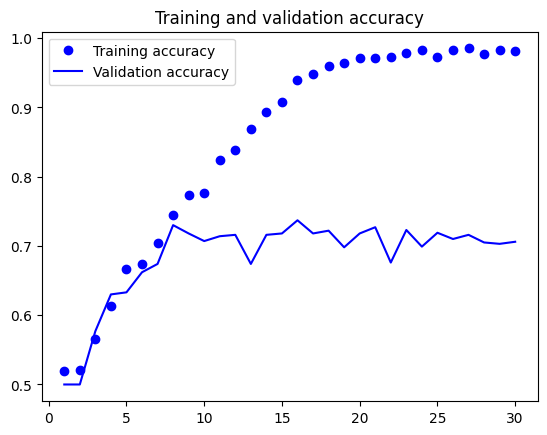

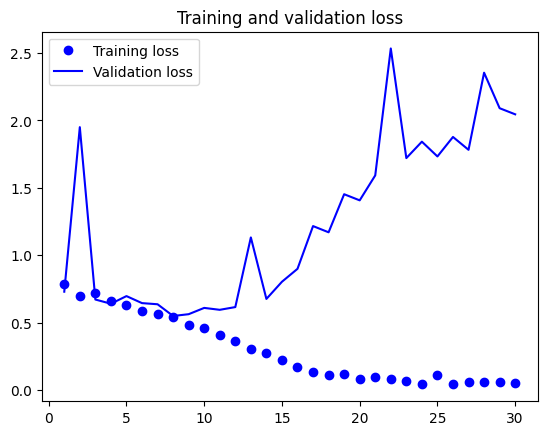

In [60]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

對測試集評估

In [61]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 9s 127ms/step - loss: 0.5605 - accuracy: 0.7215
Test accuracy: 0.721


### Using data augmentation

對資料進行強化

**Define a data augmentation stage to add to an image model**

In [62]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

顯示一些隨機進行強化的訓練圖片

有水平翻轉和調整角度

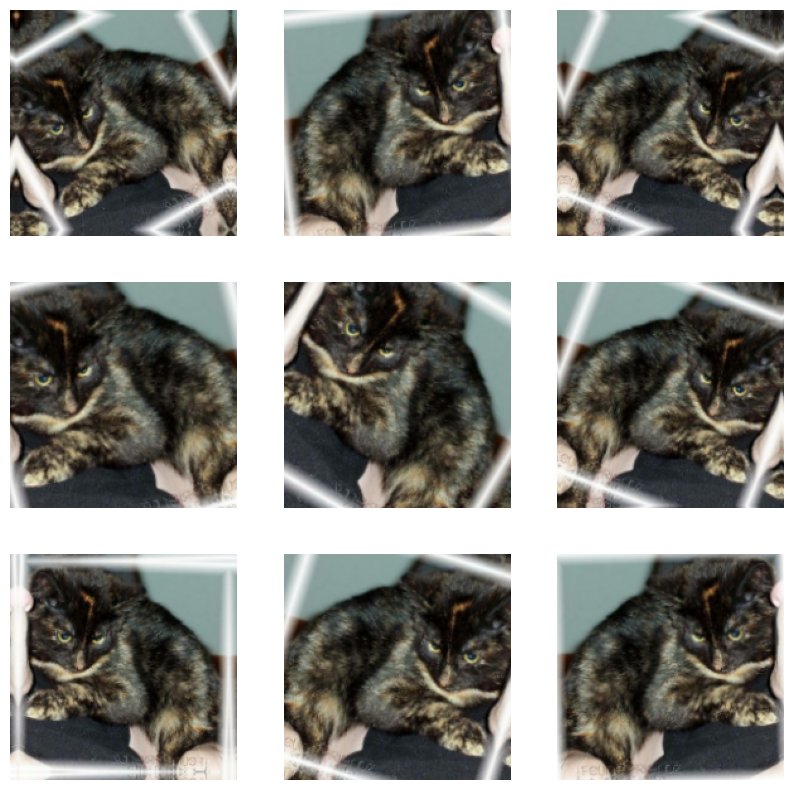

In [63]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

建立一個包含圖像增強跟具dropout的卷積網路
使用dropout可對抗過擬合

In [64]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

開始訓練

In [65]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 24s 352ms/step - loss: 0.7716 - accuracy: 0.4965 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 24s 375ms/step - loss: 0.6933 - accuracy: 0.5060 - val_loss: 0.6902 - val_accuracy: 0.5310
Epoch 3/100
63/63 [==============================] - 23s 356ms/step - loss: 0.8268 - accuracy: 0.5475 - val_loss: 0.6579 - val_accuracy: 0.5990
Epoch 4/100
63/63 [==============================] - 23s 353ms/step - loss: 0.6835 - accuracy: 0.5895 - val_loss: 2.6548 - val_accuracy: 0.5060
Epoch 5/100
63/63 [==============================] - 24s 362ms/step - loss: 0.6808 - accuracy: 0.6260 - val_loss: 0.6358 - val_accuracy: 0.6270
Epoch 6/100
63/63 [==============================] - 23s 358ms/step - loss: 0.6481 - accuracy: 0.6340 - val_loss: 0.6330 - val_accuracy: 0.6380
Epoch 7/100
63/63 [==============================] - 22s 346ms/step - loss: 0.6269 - accuracy: 0.6655 - val_loss: 0.6264 - val_accuracy:

**Evaluating the model on the test set**

對測試集評估

In [66]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 98ms/step - loss: 0.4806 - accuracy: 0.8305
Test accuracy: 0.831


## Leveraging a pretrained model

### Feature extraction with a pretrained model

使用預訓練模型進行特徵擷取

**Instantiating the VGG16 convolutional base**

使用vgg16進行卷積

In [69]:
from tensorflow import keras
from tensorflow.keras import layers

In [70]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [71]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

快速進行特徵擷取而不用圖像增強

**Extracting the VGG16 features and corresponding labels**

提取vgg16的特徵並得到相對應的標籤

In [72]:
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory

new_base_dir = pathlib.Path("dogs-vs-cats/cats_vs_dogs_small")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=8)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=8)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=8)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [73]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

定義和訓練一個相連的分類氣

In [76]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 3s 27ms/step - loss: 21.6696 - accuracy: 0.9265 - val_loss: 18.4376 - val_accuracy: 0.8970
Epoch 2/20
63/63 [==============================] - 1s 22ms/step - loss: 4.7621 - accuracy: 0.9745 - val_loss: 3.9526 - val_accuracy: 0.9740
Epoch 3/20
63/63 [==============================] - 1s 20ms/step - loss: 1.8589 - accuracy: 0.9880 - val_loss: 6.5711 - val_accuracy: 0.9640
Epoch 4/20
63/63 [==============================] - 1s 21ms/step - loss: 2.0399 - accuracy: 0.9870 - val_loss: 3.0525 - val_accuracy: 0.9820
Epoch 5/20
63/63 [==============================] - 1s 22ms/step - loss: 1.0510 - accuracy: 0.9945 - val_loss: 3.9932 - val_accuracy: 0.9760
Epoch 6/20
63/63 [==============================] - 1s 21ms/step - loss: 0.7046 - accuracy: 0.9940 - val_loss: 4.2430 - val_accuracy: 0.9760
Epoch 7/20
63/63 [==============================] - 1s 20ms/step - loss: 0.8169 - accuracy: 0.9950 - val_loss: 3.2900 - val_accuracy: 0.9780
Epoch 8/20


**Plotting the results**

顯示訓練過程的loss與準確率

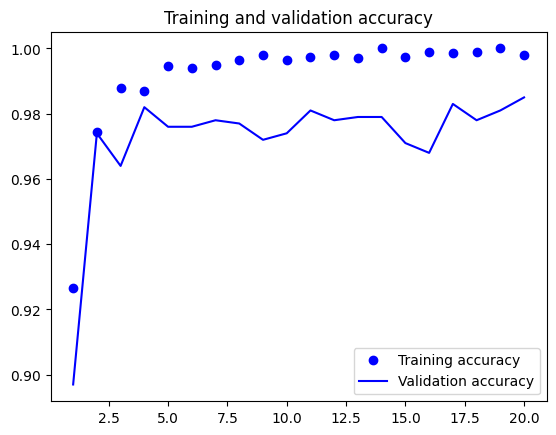

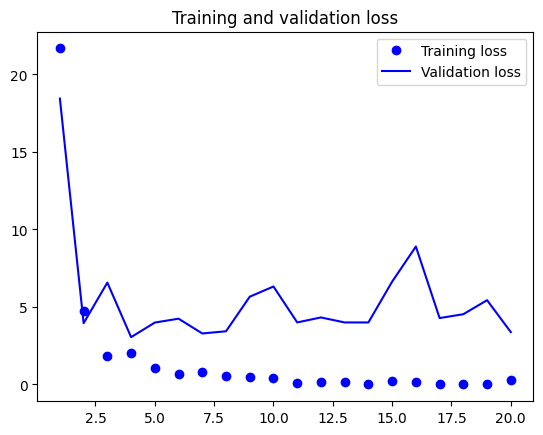

In [77]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

使用圖像增強進行特徵擷取

**Instantiating and freezing the VGG16 convolutional base**

In [78]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

印出 freezing 前後的權重

In [80]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [81]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

添加圖像增強的分類器

In [82]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [85]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
250/250 [==============================] - 127s 502ms/step - loss: 15.5236 - accuracy: 0.9040 - val_loss: 4.7503 - val_accuracy: 0.9700
Epoch 2/50
250/250 [==============================] - 120s 482ms/step - loss: 9.1650 - accuracy: 0.9460 - val_loss: 9.0680 - val_accuracy: 0.9600
Epoch 3/50
250/250 [==============================] - 125s 501ms/step - loss: 6.8641 - accuracy: 0.9615 - val_loss: 2.8745 - val_accuracy: 0.9780
Epoch 4/50
250/250 [==============================] - 128s 510ms/step - loss: 7.0563 - accuracy: 0.9615 - val_loss: 5.6998 - val_accuracy: 0.9760
Epoch 5/50
250/250 [==============================] - 127s 507ms/step - loss: 5.2124 - accuracy: 0.9640 - val_loss: 3.8438 - val_accuracy: 0.9810
Epoch 6/50
250/250 [==============================] - 124s 495ms/step - loss: 4.7577 - accuracy: 0.9650 - val_loss: 4.9487 - val_accuracy: 0.9800
Epoch 7/50
250/250 [==============================] - 127s 507ms/step - loss: 4.6466 - accuracy: 0.9680 - val_loss: 2.6995 

**Evaluating the model on the test set**

在測試集上評估

In [86]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

250/250 [==============================] - 78s 310ms/step - loss: 2.9775 - accuracy: 0.9755
Test accuracy: 0.975


### Fine-tuning a pretrained model

微調預訓練模型

In [87]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

凍結到倒數第四層的layer

In [88]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

微調

In [89]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
250/250 [==============================] - 151s 596ms/step - loss: 1.1267 - accuracy: 0.9825 - val_loss: 2.7874 - val_accuracy: 0.9830
Epoch 2/30
250/250 [==============================] - 149s 596ms/step - loss: 0.6673 - accuracy: 0.9895 - val_loss: 2.2338 - val_accuracy: 0.9810
Epoch 3/30
250/250 [==============================] - 150s 598ms/step - loss: 0.9756 - accuracy: 0.9845 - val_loss: 2.9829 - val_accuracy: 0.9800
Epoch 4/30
250/250 [==============================] - 150s 599ms/step - loss: 0.4185 - accuracy: 0.9910 - val_loss: 2.3166 - val_accuracy: 0.9820
Epoch 5/30
250/250 [==============================] - 146s 586ms/step - loss: 0.6628 - accuracy: 0.9885 - val_loss: 3.2567 - val_accuracy: 0.9770
Epoch 6/30
250/250 [==============================] - 151s 603ms/step - loss: 0.6916 - accuracy: 0.9910 - val_loss: 2.7187 - val_accuracy: 0.9800
Epoch 7/30
250/250 [==============================] - 148s 592ms/step - loss: 0.3327 - accuracy: 0.9930 - val_loss: 2.7422 -

In [90]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

250/250 [==============================] - 78s 310ms/step - loss: 2.4788 - accuracy: 0.9785
Test accuracy: 0.979


## Summary